efficiency 0.13852733372162968


/var/folders/4k/_8htd_v90ssgbsvwkrwh8ph80000gn/T/ipykernel_5021/1675842361.py:30: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_echo = np.trapz(echo,x)
/var/folders/4k/_8htd_v90ssgbsvwkrwh8ph80000gn/T/ipykernel_5021/1675842361.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_cross = np.trapz(input_cross,x)
/var/folders/4k/_8htd_v90ssgbsvwkrwh8ph80000gn/T/ipykernel_5021/1675842361.py:32: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_no_rephasing = np.trapz(input_no_rephasing,x)


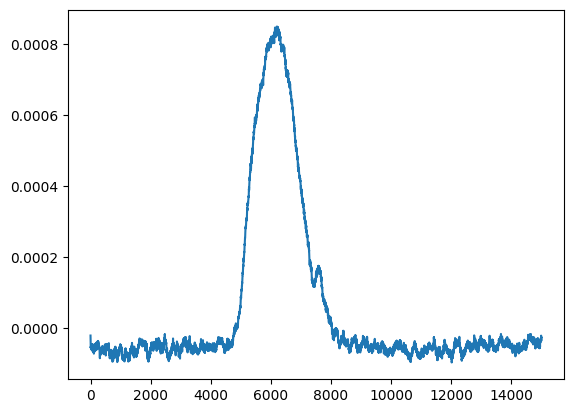

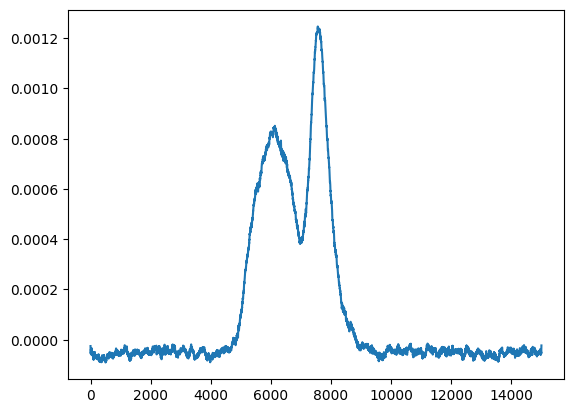

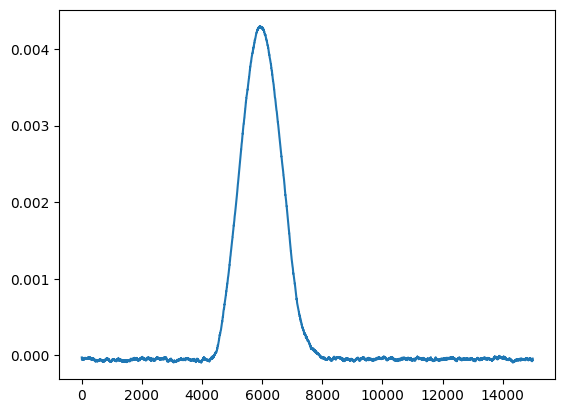

In [15]:
###READ ME This is old code was used as tests look at functions for proper code

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

folder_path = 'echo_data'

csv_files = [f for f in os.listdir(folder_path) if f.endswith('csv')]
dataframes = {}
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    key = os.path.splitext(file)[0]
    dataframes[key] = df

second_col = {key: df.iloc[:, 2] for key, df in dataframes.items()}

kernal_size = 10
kernal = np.transpose(np.ones(kernal_size)/kernal_size)

input_cross = second_col[csv_files[0].split('.')[0]]
input_no_rephasing = second_col[csv_files[1].split('.')[0]]
echo = second_col[csv_files[2].split('.')[0]]

input_cross = np.convolve(input_cross,kernal,mode='same')
input_no_rephasing = np.convolve(input_no_rephasing,kernal,mode='same')
echo = np.convolve(echo,kernal,mode='same')

x = np.arange(len(echo))
area_echo = np.trapz(echo,x)
area_cross = np.trapz(input_cross,x)
area_no_rephasing = np.trapz(input_no_rephasing,x)

fitness = (area_echo-area_cross)/area_no_rephasing

print('efficiency', fitness)
plt.plot(input_cross)
plt.show()
plt.plot(echo)
plt.show()
plt.plot(input_no_rephasing)
plt.show()

In [6]:
import numpy as np
import pandas as pd
import os

echo_data_folder = os.path.join(os.path.dirname(__file__), '..', 'echo_data')

def fitness(echo_data_folder):

    #This imports the echo csv files (echo_data_folder is the folder that will contain the echo data)
    data_frames = {}

    for root, dirs, files in os.walk(echo_data_folder):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                file_name = os.path.splitext(os.path.basename(file_path))[0]
                data_frames[file_name] = pd.read_csv(file_path)

    # Getting the second column from the csv files
    echo_col = data_frames.get('0_echo')['column2']
    cross_col = data_frames.get('0_input_cross', None)['Column2']
    no_rephasing_col = data_frames.get('0_input_no_rephasing', None)['Column2']

    # For smoothing data
    kernal_size = 10
    kernal = np.transpose(np.ones(kernal_size)/kernal_size)


    cross = np.convolve(cross_col,kernal,mode='same')
    no_rephasing = np.convolve(no_rephasing_col,kernal,mode='same')
    echo = np.convolve(echo_col,kernal,mode='same')

    # Finding the area
    x = np.arange(len(echo))
    area_echo = np.trapz(echo,x)
    area_cross = np.trapz(cross,x)
    area_no_rephasing = np.trapz(no_rephasing,x)

    # Finding the efficiency
    fitness = (area_echo-area_cross)/area_no_rephasing

    return fitness

# Defining the path to the folder containing the echo data CSV files. Used for fitness function
echo_data_folder = os.path.join(os.path.dirname(__file__), '..', 'echo_data')

fit = fitness(echo_data_folder)


NameError: name '__file__' is not defined

In [8]:
import numpy as np
import pandas as pd
import os

echo_data_folder = os.path.join(os.getcwd(), '..', 'echo_data')
csv_files = [f for f in os.listdir(echo_data_folder) if f.endswith('.csv')]
AAAA = {f: pd.read_csv(os.path.join(echo_data_folder, f)) for f in csv_files}

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tymonfellmann/Library/Mobile Documents/com~apple~CloudDocs/Documents/Documents - Tymon’s MacBook Air/GitHub/AFC_GA/AFC/../echo_data'

In [26]:
import os
import pandas as pd
import numpy as np


echo_data_folder = 'echo_data'
def fitness(echo_data_folder):

    csv_files = [f for f in os.listdir(echo_data_folder) if f.endswith('.csv')]

    data_frames = [pd.read_csv(os.path.join(echo_data_folder, csv_file)) for csv_file in csv_files[:3]]
    
    # Extract the second column from each dataframe
    no_rephasing_col = data_frames[0].iloc[:, 2]
    cross_col = data_frames[1].iloc[:, 2]
    echo_col = data_frames[2].iloc[:, 2]


    # Getting the second column from the csv files
   # echo_col = data_frames['0_echo']['C_2 (V)'].values
  #  cross_col = data_frames['0_input_cross']['C_2 (V)'].values
  #  no_rephasing_col = data_frames['0_input_no_rephasing']['C_2 (V)'].values

    # For smoothing data
    kernal_size = 10
    kernal = np.transpose(np.ones(kernal_size)/kernal_size)


    cross = np.convolve(cross_col,kernal,mode='same')
    no_rephasing = np.convolve(no_rephasing_col,kernal,mode='same')
    echo = np.convolve(echo_col,kernal,mode='same')

    # Finding the area
    x = np.arange(len(echo))
    area_echo = np.trapz(echo,x)
    area_cross = np.trapz(cross,x)
    area_no_rephasing = np.trapz(no_rephasing,x)

    # Finding the efficiency
    fitness = (area_echo-area_cross)/area_no_rephasing

    return fitness

fit = fitness(echo_data_folder)
print(fit)

-6.037760317617612


/var/folders/4k/_8htd_v90ssgbsvwkrwh8ph80000gn/T/ipykernel_1410/910047622.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_echo = np.trapz(echo,x)
/var/folders/4k/_8htd_v90ssgbsvwkrwh8ph80000gn/T/ipykernel_1410/910047622.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_cross = np.trapz(cross,x)
/var/folders/4k/_8htd_v90ssgbsvwkrwh8ph80000gn/T/ipykernel_1410/910047622.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_no_rephasing = np.trapz(no_rephasing,x)


In [12]:
import os
import pandas as pd
import numpy as np

echo_data_folder = 'echo_data'

files_to_process = {
        '0_echo.csv': 'echo_col',                   # Variable name for echo_col
        '0_input_cross.csv': 'cross_col',           # Variable name for cross_col
        '0_input_no_rephasing.csv': 'no_rephasing_col'  # Variable name for no_rephasing_col
    }
    
    # Dictionary to store DataFrames
data_frames = {}
    
    # Read each file into the dictionary and assign to variables
for filename, var_name in files_to_process.items():
    file_path = os.path.join(echo_data_folder, filename)
    data = pd.read_csv(file_path)
    data_frames[var_name] = data.iloc[:, 2]

    # For smoothing data
kernal_size = 10
kernal = np.transpose(np.ones(kernal_size)/kernal_size)

cross = np.convolve(cross_col,kernal,mode='same')
no_rephasing = np.convolve(no_rephasing_col,kernal,mode='same')
echo = np.convolve(echo_col,kernal,mode='same')

    # Finding the area
x = np.arange(len(echo))
area_echo = np.trapz(echo,x)
area_cross = np.trapz(cross,x)
area_no_rephasing = np.trapz(no_rephasing,x)

    # Finding the efficiency
fitness = (area_echo-area_cross)/area_no_rephasing
fit = (area_echo-area_no_rephasing)/area_cross


print(fitness)
print(fit)





-6.037760317617612
0.13852733372162968


/var/folders/4k/_8htd_v90ssgbsvwkrwh8ph80000gn/T/ipykernel_4696/182779216.py:32: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_echo = np.trapz(echo,x)
/var/folders/4k/_8htd_v90ssgbsvwkrwh8ph80000gn/T/ipykernel_4696/182779216.py:33: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_cross = np.trapz(cross,x)
/var/folders/4k/_8htd_v90ssgbsvwkrwh8ph80000gn/T/ipykernel_4696/182779216.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_no_rephasing = np.trapz(no_rephasing,x)


In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
echo_data_folder = 'echo_data'

def efficiency(echo_data_folder):

    file_columns = {
        '0_echo.csv': 2,                   # Second column of file 0_echo.csv
        '0_input_cross.csv': 2,            # Second column of file 0_input_cross.csv
        '0_input_no_rephasing.csv': 2      # Second column of file 0_input_no_rephasing.csv
    }
    
    # Dictionary to store DataFrames
    data_frames = {}
    
    # Read each file into the dictionary
    for filename, col_index in file_columns.items():
        file_path = os.path.join(echo_data_folder, filename)
        data_frames[filename] = pd.read_csv(file_path)
    

    echo_col, cross_col, no_rephasing_col = [
    data_frames[filename].iloc[:, col_index]
    for filename, col_index in file_columns.items()
    ]

    # For smoothing data
    kernal_size = 10
    kernal = np.transpose(np.ones(kernal_size)/kernal_size)

    cross = np.convolve(cross_col,kernal,mode='same')
    no_rephasing = np.convolve(no_rephasing_col,kernal,mode='same')
    echo = np.convolve(echo_col,kernal,mode='same')

    # Finding the area
    x = np.arange(len(echo))
    area_echo = np.trapezoid(echo,x)
    area_cross = np.trapezoid(cross,x)
    area_no_rephasing = np.trapezoid(no_rephasing,x)

    # Finding the efficiency
    efficiency = (area_echo-area_no_rephasing)/area_cross

    return efficiency

fit = efficiency(echo_data_folder)
print(fit)




0.13852733372162968
